# Week 4 Individual Assignment 
## Emily DiPressi 
This week I would like to take what I have learned so far in the labs and use my group data to try and expand my familiarity and fluency with the different functions. 

In [11]:
# to manipulate and visualize spatial data
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [12]:
kids = gpd.read_file('kids.csv')

In [13]:
hc = gpd.read_file('hate_crimes.csv')

In [14]:
kids.shape

(23460, 7)

In [15]:
hc.shape

(51, 13)

In [16]:
hc.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,geometry
0,Alabama,42278,0.06,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125838926,1.806410489,None
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740118,1.656700109,None
2,Arizona,49254,0.063,0.9,0.842,0.1,0.09,0.455,0.49,0.5,0.225319954,3.413927994,None
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.6,0.069060773,0.869208872,None
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805361,2.397985899,None


In [58]:
hc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   state                                     51 non-null     object  
 1   median_household_income                   51 non-null     float64 
 2   share_unemployed_seasonal                 51 non-null     float64 
 3   share_population_in_metro_areas           51 non-null     float64 
 4   share_population_with_high_school_degree  51 non-null     float64 
 5   share_non_citizen                         51 non-null     object  
 6   share_white_poverty                       51 non-null     float64 
 7   gini_index                                51 non-null     float64 
 8   share_non_white                           51 non-null     float64 
 9   share_voters_voted_trump                  51 non-null     float64 
 10  hate_crimes_per_100k

In [18]:
# rename columns 
list(kids)

['state', 'variable', 'year', 'raw', 'inf_adj', 'inf_adj_perchild', 'geometry']

In [83]:
kids.columns = ['state', 'variable', 'year', 'raw_amount_spent', '2016_dollars_spent', '2016_dollars_spent_per_child', 'geometry']

In [84]:
kids.head()

,state,variable,year,raw_amount_spent,2016_dollars_spent,2016_dollars_spent_per_child,geometry
0,Alabama,PK12ed,1997,3271969,4665308.5,3.9294486045837402,None
1,Alaska,PK12ed,1997,1042311,1486170,7.548493385314941,None
2,Arizona,PK12ed,1997,3388165,4830985.5,3.706679344177246,None
3,Arkansas,PK12ed,1997,1960613,2795523,3.891274929046631,None
4,California,PK12ed,1997,28708364,40933568,4.28232479095459,None


In [32]:
hc['median_household_income'].astype(float)

0     42278.0
1     67629.0
2     49254.0
3     44922.0
4     60487.0
5     60940.0
6     70161.0
7     57522.0
8     68277.0
9     46140.0
10    49555.0
11    71223.0
12    53438.0
13    54916.0
14    48060.0
15    57810.0
16    53444.0
17    42786.0
18    42406.0
19    51710.0
20    76165.0
21    63151.0
22    52005.0
23    67244.0
24    35521.0
25    56630.0
26    51102.0
27    56870.0
28    49875.0
29    73397.0
30    65243.0
31    46686.0
32    54310.0
33    46784.0
34    60730.0
35    49644.0
36    47199.0
37    58875.0
38    55173.0
39    58633.0
40    44929.0
41    53053.0
42    43716.0
43    53875.0
44    63383.0
45    60708.0
46    66155.0
47    59068.0
48    39552.0
49    58080.0
50    55690.0
Name: median_household_income, dtype: float64

In [33]:
hc.dtypes

state                                         object
median_household_income                       object
share_unemployed_seasonal                     object
share_population_in_metro_areas               object
share_population_with_high_school_degree      object
share_non_citizen                             object
share_white_poverty                           object
gini_index                                    object
share_non_white                               object
share_voters_voted_trump                      object
hate_crimes_per_100k_splc                     object
avg_hatecrimes_per_100k_fbi                   object
geometry                                    geometry
dtype: object

Here and above, I am trying to understand the data and figure out how and can use it. I see that the numerical values that I want are actually considered objects and will not function how I want them to so I need to change them into either integers or floats. I decide to change them into floats as most of them have decimal values. 

In [35]:
hc["median_household_income"] = hc.median_household_income.astype(float)

In [36]:
hc.dtypes

state                                         object
median_household_income                      float64
share_unemployed_seasonal                     object
share_population_in_metro_areas               object
share_population_with_high_school_degree      object
share_non_citizen                             object
share_white_poverty                           object
gini_index                                    object
share_non_white                               object
share_voters_voted_trump                      object
hate_crimes_per_100k_splc                     object
avg_hatecrimes_per_100k_fbi                   object
geometry                                    geometry
dtype: object

I successfully found a way to convert the object into a float. Below,I have converted the rest of my objects into floats. 

In [39]:
hc["share_unemployed_seasonal"] = hc.share_unemployed_seasonal.astype(float)

In [40]:
hc["share_population_in_metro_areas"] = hc.share_population_in_metro_areas.astype(float)

In [41]:
hc["share_population_with_high_school_degree"] = hc.share_population_with_high_school_degree.astype(float)

In [44]:
hc["share_white_poverty"] = hc.share_white_poverty.astype(float)

In [45]:
hc["gini_index"] = hc.gini_index.astype(float)

In [46]:
hc["share_non_white"] = hc.share_non_white.astype(float)

In [47]:
hc["share_voters_voted_trump"] = hc.share_voters_voted_trump.astype(float)

All but three of the objects were able to be converted into floats, I am not sure why those three were not able to be converted, so I have omited them.

Checking to make sure my floats were properly converted

In [51]:
hc.dtypes

state                                         object
median_household_income                      float64
share_unemployed_seasonal                    float64
share_population_in_metro_areas              float64
share_population_with_high_school_degree     float64
share_non_citizen                             object
share_white_poverty                          float64
gini_index                                   float64
share_non_white                              float64
share_voters_voted_trump                     float64
hate_crimes_per_100k_splc                     object
avg_hatecrimes_per_100k_fbi                   object
geometry                                    geometry
share_white_povertyl                         float64
dtype: object

Everything worked as expected. The three (non citizen, hate crimes per 100k, and average hate crimes per 100k) that came up as erros when I initially tried to convert to floats and didn't work, stayed the same. 

Trying the info function again. 

In [53]:
hc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   state                                     51 non-null     object  
 1   median_household_income                   51 non-null     float64 
 2   share_unemployed_seasonal                 51 non-null     float64 
 3   share_population_in_metro_areas           51 non-null     float64 
 4   share_population_with_high_school_degree  51 non-null     float64 
 5   share_non_citizen                         51 non-null     object  
 6   share_white_poverty                       51 non-null     float64 
 7   gini_index                                51 non-null     float64 
 8   share_non_white                           51 non-null     float64 
 9   share_voters_voted_trump                  51 non-null     float64 
 10  hate_crimes_per_100k

To properly use the info function "()" are needed at the end. I now also accidentally have a repeat value with a typo, not sure how to get rid of it, because I fixed the typo in the above conversion and it is still here. 

Trying a simple plot to test out if the data can now be used numerically. 

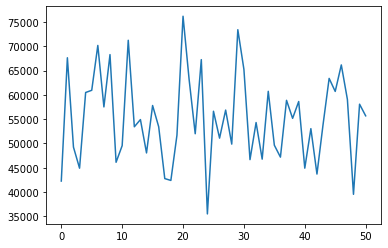

In [55]:
hc['median_household_income'].plot()

The function worked. Median household income for the 50 states plus DC have been plotted. 

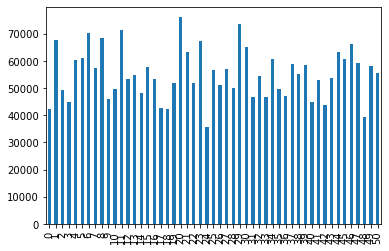

In [63]:
hc['median_household_income'].plot.bar(x='state', y='median_household_income')

Same thing but in a bar graph. I wanted to have the x axis labeled with state names instead of the numbers assigned to them. 

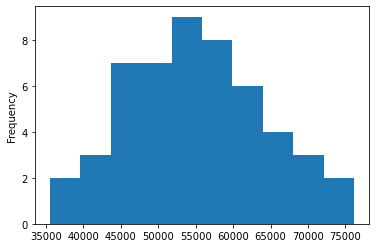

In [60]:
hc['median_household_income'].plot.hist()

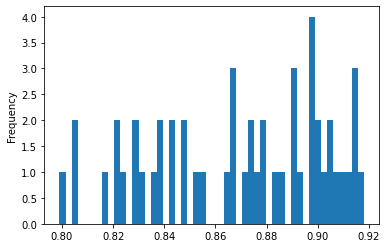

In [74]:
hc['share_population_with_high_school_degree'].plot.hist(bins=50)

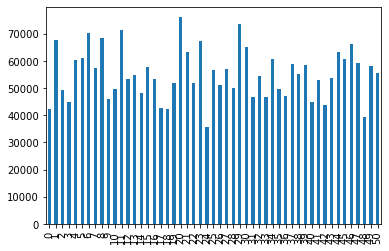

In [76]:
hc['median_household_income'].plot.bar(x='state', y='median_household_income')

In [103]:
hc.sample(24)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,geometry,share_white_povertyl
20,Maryland,76165.0,0.051,0.97,0.890,0.08,0.06,0.443,0.50,0.35,0.37043897,1.324839538,None,0.06
24,Mississippi,35521.0,0.061,0.45,0.804,,0.14,0.468,0.44,0.58,0.067446801,0.622745989,None,0.14
36,Oklahoma,47199.0,0.044,0.59,0.856,0.04,0.10,0.454,0.35,0.65,0.133629099,1.08167215,None,0.10
42,Tennessee,43716.0,0.057,0.82,0.831,0.04,0.13,0.468,0.27,0.61,0.19993848,3.13605115,None,0.13
48,West Virginia,39552.0,0.073,0.55,0.828,0.01,0.14,0.451,0.07,0.69,0.328677075,2.037053631,None,0.14
38,Pennsylvania,55173.0,0.053,0.87,0.879,0.03,0.09,0.461,0.24,0.49,0.285101092,0.43092759,None,0.09
7,Delaware,57522.0,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754169,1.469979563,None,0.08
15,Iowa,57810.0,0.036,0.60,0.914,0.03,0.09,0.427,0.15,0.52,0.454427421,0.561395565,None,0.09
45,Vermont,60708.0,0.037,0.35,0.910,0.01,0.10,0.444,0.06,0.33,0.324149109,1.90308139,None,0.10
33,North Carolina,46784.0,0.058,0.76,0.843,0.05,0.10,0.464,0.38,0.51,0.244006588,1.262679796,None,0.10


## Trying a different route 

What would be helpful to the project would be to see which states have a higher average hate crime rate, median household income, and/or high school degree to then look at the maps produced that have high percentages of minority populations and see if there are correlations. With the above produced graphs, it is harder to see what state the values belong to. 

In [92]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# for plotting
import matplotlib.pyplot as plt

In [93]:
race = gpd.read_file('acs2019_1yr_B03002_04000US46.geojson')

In [94]:
# deleting columns I do not need and keeping the ones I do need
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002002',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002012',
                   'geometry']

In [95]:
# redefining race to be only with the columns I want
race = race[columns_to_keep]

In [96]:
# renaming columns 
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [97]:
# renaming columns 
race.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black or African American',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Some other race',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [98]:
# replacing values with percentages 
race['Percent Non Hispanic White'] = race['Non Hispanic White']/race['Total']*100
race['Percent Non Hispanic Black or African American'] = race['Non Hispanic Black or African American']/race['Total']*100
race['Percent Non Hispanic American Indian and Alaska Native'] = race['Non Hispanic American Indian and Alaska Native']/race['Total']*100
race['Percent Non Hispanic Asian'] = race['Non Hispanic Asian']/race['Total']*100
race['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = race['Non Hispanic Native Hawaiian and Other Pacific Islander']/race['Total']*100
race['Percent Some other race'] = race['Some other race']/race['Total']*100
race['Percent Two or more races'] = race['Two or more races']/race['Total']*100
race['Percent Hispanic or Latino'] = race['Hispanic or Latino']/race['Total']*100

In [99]:
race.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black or African American,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Some other race,...,Hispanic or Latino,geometry,Percent Non Hispanic White,Percent Non Hispanic Black or African American,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Some other race,Percent Two or more races,Percent Hispanic or Latino
0,01000US,United States,328239523.0,267757777.0,196789401.0,40596040.0,2236348.0,18427914.0,565473.0,839270.0,...,60481746.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199...",59.952988,12.367810,0.681316,5.614167,0.172275,0.255688,2.529656,18.426101
1,04000US01,Alabama,4903185.0,4683889.0,3192955.0,1312821.0,19364.0,65215.0,1520.0,9623.0,...,219296.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ...",65.120019,26.774862,0.394927,1.330054,0.031000,0.196260,1.680357,4.472521
2,04000US02,Alaska,731545.0,678997.0,437714.0,21773.0,113467.0,43322.0,9715.0,2096.0,...,52548.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630...",59.834187,2.976304,15.510597,5.921987,1.328011,0.286517,6.959244,7.183153
3,04000US04,Arizona,7278717.0,4968125.0,3929213.0,319045.0,289161.0,235202.0,13361.0,10110.0,...,2310592.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",53.982220,4.383259,3.972692,3.231366,0.183563,0.138898,2.363507,31.744496
4,04000US05,Arkansas,3017804.0,2785853.0,2171931.0,464996.0,16216.0,45839.0,12673.0,3094.0,...,231951.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ...",71.970579,15.408423,0.537344,1.518952,0.419941,0.102525,2.356150,7.686086


In [101]:
# adding a base layer 
race_web_mercator = race.to_crs(epsg=3857)

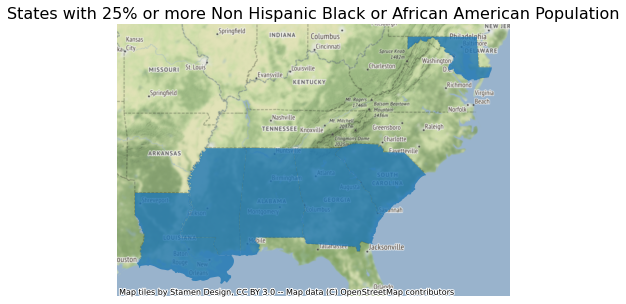

In [102]:
# Using subplots
fig, ax = plt.subplots(figsize=(20, 5))

# Add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Non Hispanic Black or African American'] > 25].plot(ax=ax, alpha=0.8)

# Turn the axis off
ax.axis('off')

# Set a title
ax.set_title('States with 25% or more Non Hispanic Black or African American Population',fontsize=16)

# Add a basemap
ctx.add_basemap(ax)

Maryland seems like an oulier state. From the graphs above, Mississippi (24) has a low household income level, and it is highlighted here as a state that has a high (relative) minority population. 

Trying to see if I can view the state of Mississippi's buildings to possibly see the building locations --> areas of lower income. 

## Street Maps 

In [128]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctxi

# for plotting
import matplotlib.pyplot as plt

In [129]:
# location
address = 'Sacramento, CA'

# tags for what type of data we are getting
tags = {'building':True}

# distance from location point in meters
dist = 1000 

In [130]:
# get the data from OSM 
osm = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

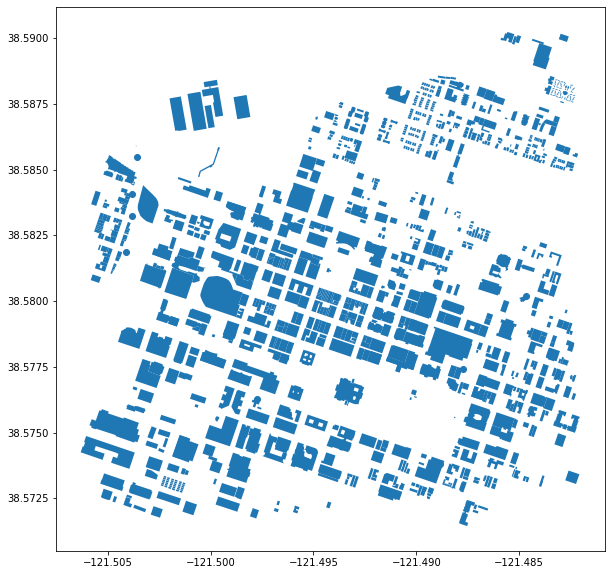

In [131]:
# quick plot
osm.plot(figsize=(10,10))

In [132]:
# Get a full list of columns
list(osm)

['unique_id',
 'osmid',
 'element_type',
 'addr:state',
 'building',
 'ele',
 'gnis:county_name',
 'gnis:feature_id',
 'gnis:import_uuid',
 'gnis:reviewed',
 'name',
 'source',
 'geometry',
 'tourism',
 'wikidata',
 'addr:housenumber',
 'addr:street',
 'amenity',
 'wheelchair',
 'parking',
 'image',
 'image_1',
 'nodes',
 'network',
 'operator',
 'shop',
 'created_by',
 'addr:postcode',
 'building:levels',
 'height',
 'addr:city',
 'ref',
 'denomination',
 'diocese',
 'phone',
 'religion',
 'website',
 'website_1',
 'fee',
 'addr:country',
 'office',
 'note',
 'wikipedia',
 'capacity:disabled',
 'cuisine',
 'access',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'architect',
 'year_built',
 'alt_name',
 'official_name',
 'building_1',
 'leisure',
 'name:en',
 'name:zh',
 'sport',
 'source:geometry',
 'heritage',
 'historic',
 'start_date',
 'subject:wikidata',
 'fax',
 'internet_access',
 'smoking',
 'end_date',
 'level',
 'delivery',
 'drive_through',
 'email',
 'opening_hours',
 

In [133]:
osm.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1052 entries, 0 to 1051
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   unique_id          1052 non-null   object  
 1   osmid              1052 non-null   int64   
 2   element_type       1052 non-null   object  
 3   addr:state         81 non-null     object  
 4   building           1052 non-null   object  
 5   ele                32 non-null     object  
 6   gnis:county_name   32 non-null     object  
 7   gnis:feature_id    31 non-null     object  
 8   gnis:import_uuid   30 non-null     object  
 9   gnis:reviewed      21 non-null     object  
 10  name               149 non-null    object  
 11  source             114 non-null    object  
 12  geometry           1052 non-null   geometry
 13  tourism            10 non-null     object  
 14  wikidata           28 non-null     object  
 15  addr:housenumber   80 non-null     object  
 16

In [134]:
columns_to_keep = ['geometry','building','height','start_date']
osm = osm[columns_to_keep]
osm.sample(10)

,geometry,building,height,start_date
111,"POLYGON ((-121.50188 38.57410, -121.50107 38.5...",public,NaN,NaN
863,"POLYGON ((-121.49069 38.58620, -121.49069 38.5...",house,NaN,NaN
24,"POLYGON ((-121.50469 38.57259, -121.50455 38.5...",yes,NaN,NaN
417,"POLYGON ((-121.48707 38.57816, -121.48698 38.5...",yes,NaN,NaN
920,"POLYGON ((-121.48231 38.58524, -121.48235 38.5...",yes,NaN,NaN
173,"POLYGON ((-121.49486 38.57887, -121.49505 38.5...",yes,NaN,NaN
939,"POLYGON ((-121.49305 38.58531, -121.49297 38.5...",house,NaN,NaN
472,"POLYGON ((-121.50029 38.58272, -121.50035 38.5...",yes,NaN,NaN
49,"POLYGON ((-121.50202 38.58201, -121.50186 38.5...",yes,NaN,NaN
760,"POLYGON ((-121.49299 38.58616, -121.49264 38.5...",yes,NaN,NaN


In [135]:
osm['height'].describe()

count     23
unique    17
top       66
freq       3
Name: height, dtype: object

In [136]:
osm['height'] = osm['height'].astype(float)
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1052 entries, 0 to 1051
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    1052 non-null   geometry
 1   building    1052 non-null   object  
 2   height      23 non-null     float64 
 3   start_date  3 non-null      object  
dtypes: float64(1), geometry(1), object(2)
memory usage: 41.1+ KB
